In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from IPython.display import Image
import cv2 as cv
import os
import pydot
from tensorflow.keras.layers import Dropout
from skimage.metrics import peak_signal_noise_ratio ,structural_similarity,mean_squared_error
import pickle
import sys
sys.path.append('/kaggle/input/imd_precip_library/other/default/9')
from Data_processing_zero import Data_Processing as dp
from Data_processing_zero import Training as tn
from keras.models import load_model
from tensorflow.keras.utils import custom_object_scope

In [2]:
SR_file_path = '/kaggle/input/imd-lr-sr/data/data.pkl'
with open(SR_file_path, 'rb') as file:
    SR_data = pickle.load(file)

In [3]:
SR_data_base,Metadata = dp.process_base_data(SR_data)
SR_data_processed,LR_data_processed,Metadata,daily_max = dp.generate_dataset(SR_data_base,Metadata)
SR_mask,LR_mask,HR_mask = dp.create_mask([SR_data_base[0]])

Step 1 completed
Step 2 completed
Step 3 completed
Step 4 completed
Step 5 completed


In [4]:
class DepthToSpaceLayer(tf.keras.layers.Layer):
    def __init__(self, block_size, **kwargs):
        super(DepthToSpaceLayer, self).__init__(**kwargs)
        self.block_size = block_size

    def call(self, inputs):
        return tf.nn.depth_to_space(inputs, self.block_size)

    def get_config(self):
        config = super(DepthToSpaceLayer, self).get_config()
        config.update({"block_size": self.block_size})
        return config

with custom_object_scope({'DepthToSpaceLayer': DepthToSpaceLayer}):
    Generator = load_model('/kaggle/input/epoch_5/tensorflow2/total_8_epochs/4/generator_epoch_25.h5')

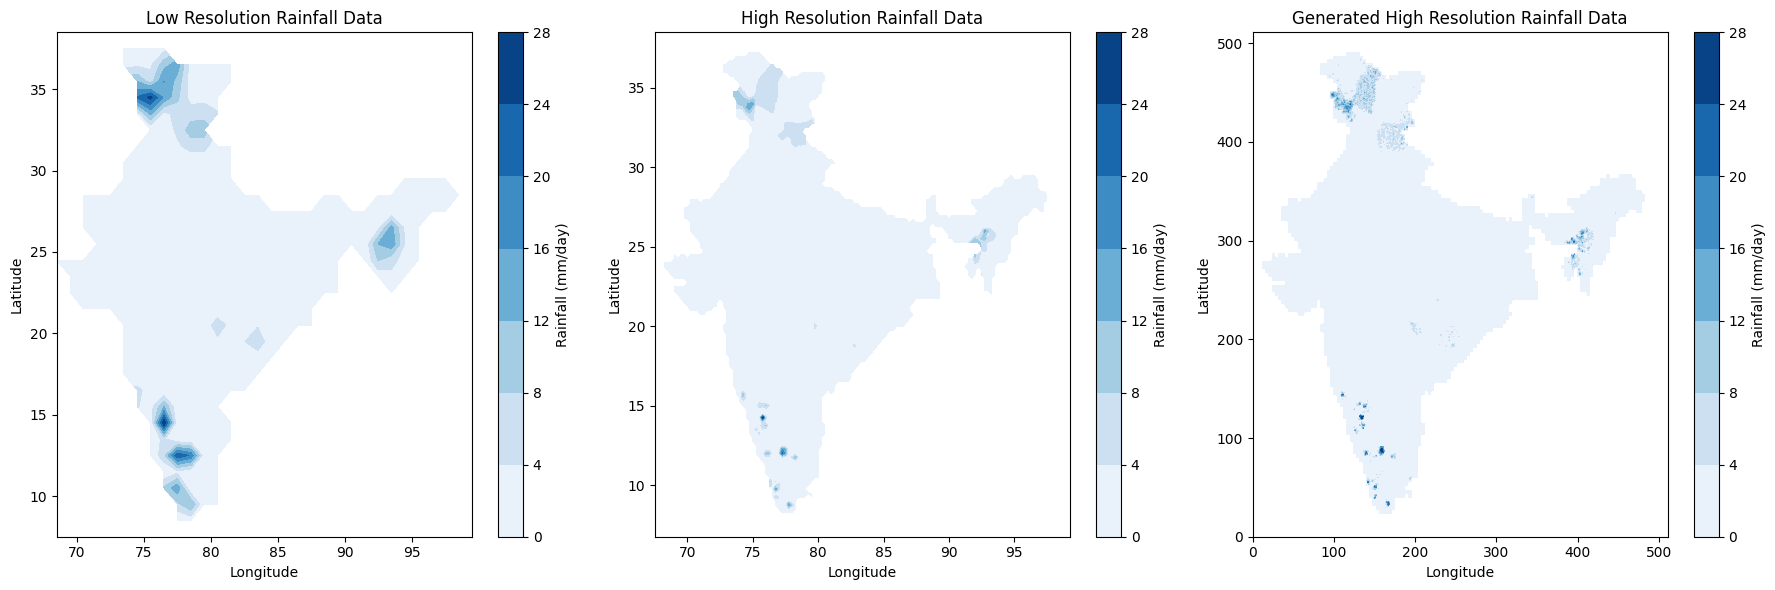

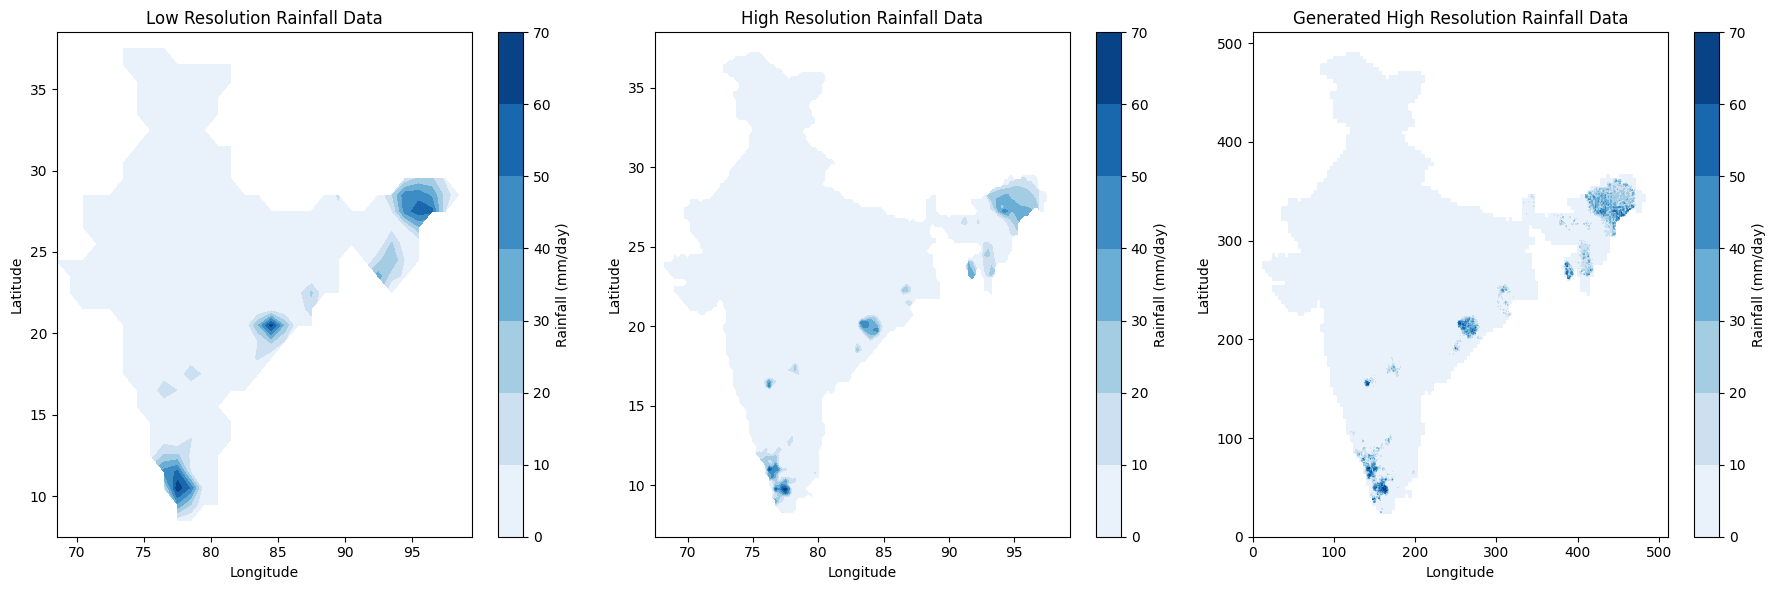

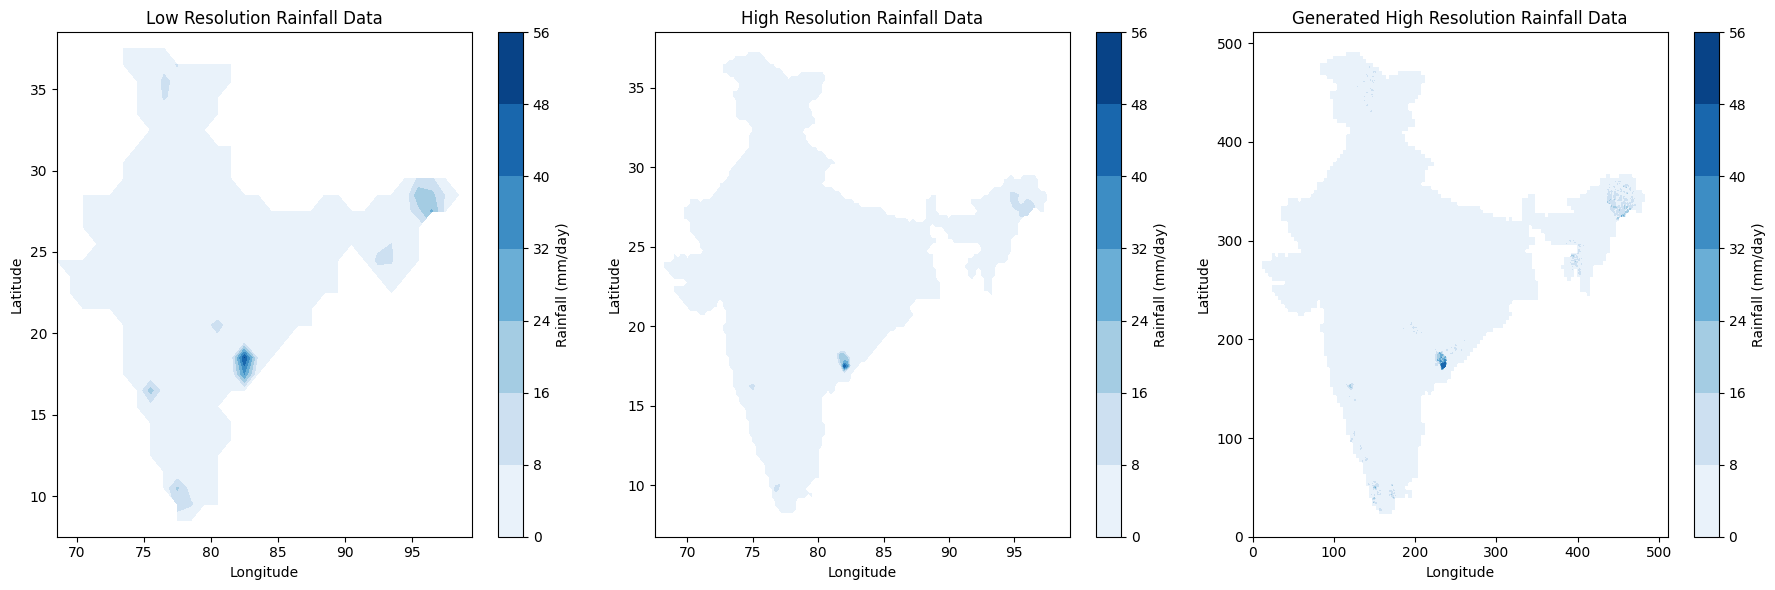

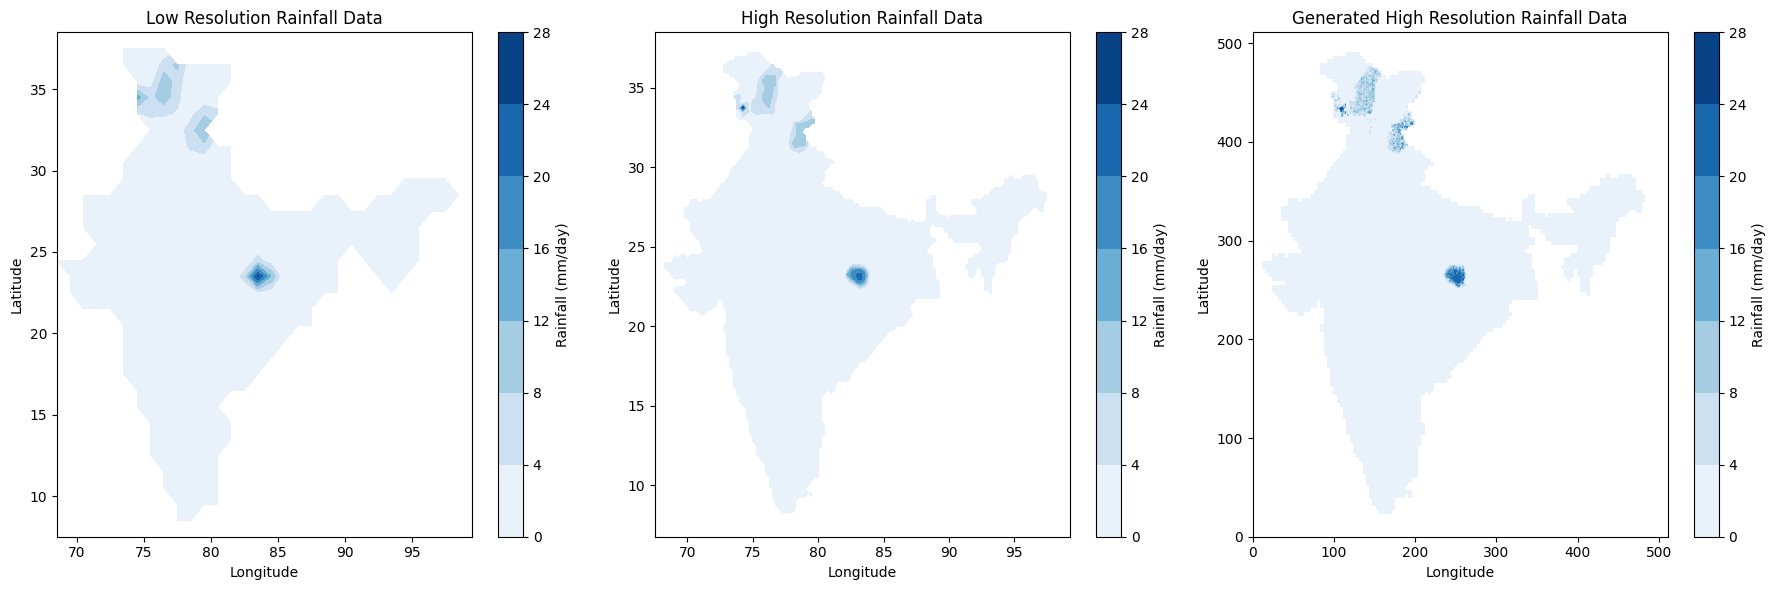

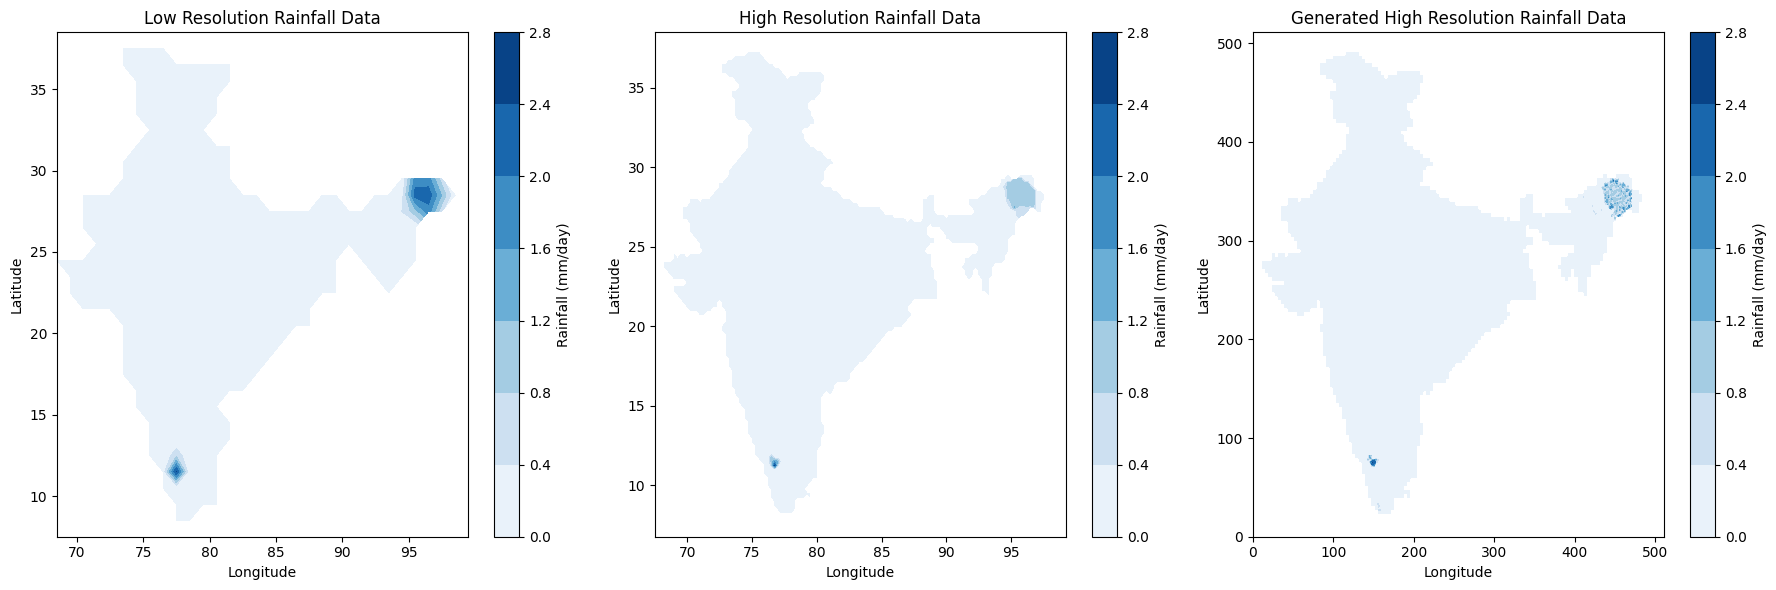

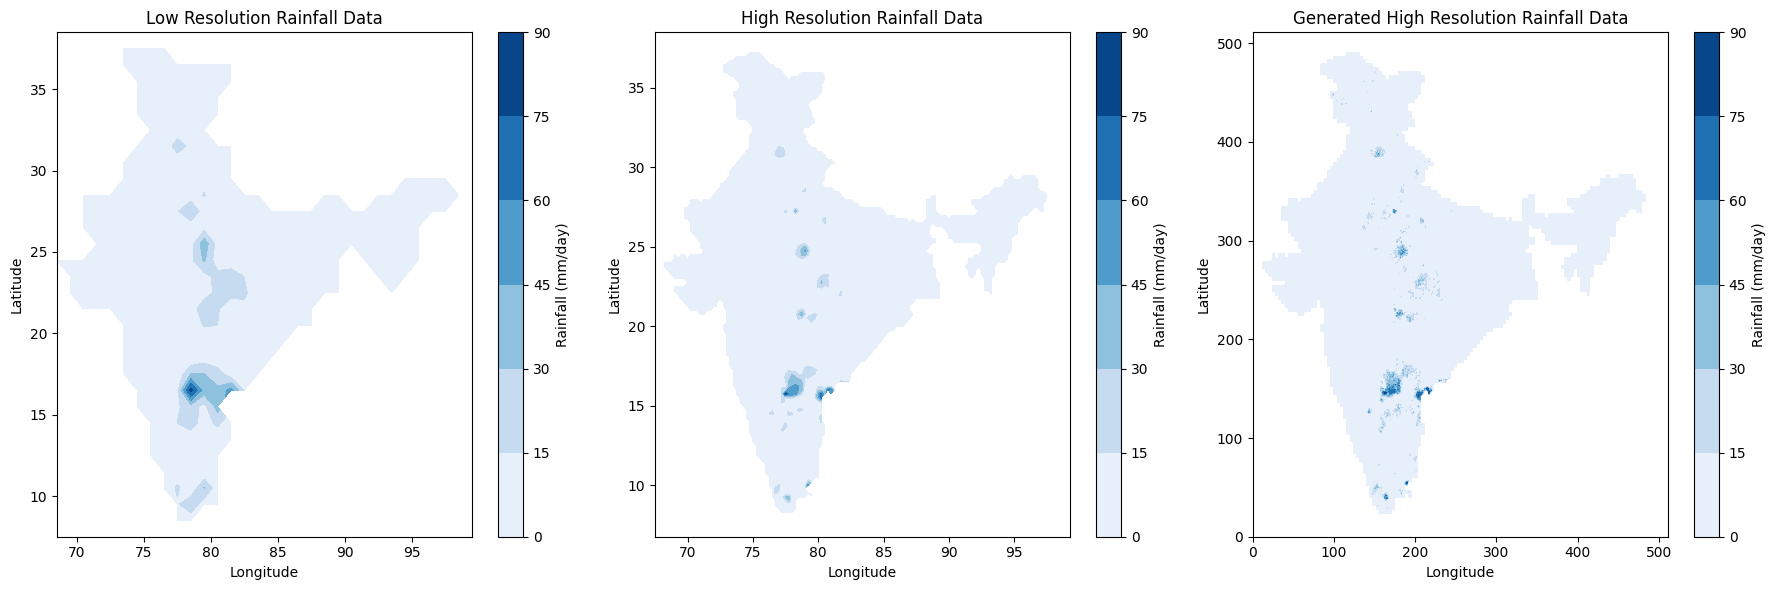

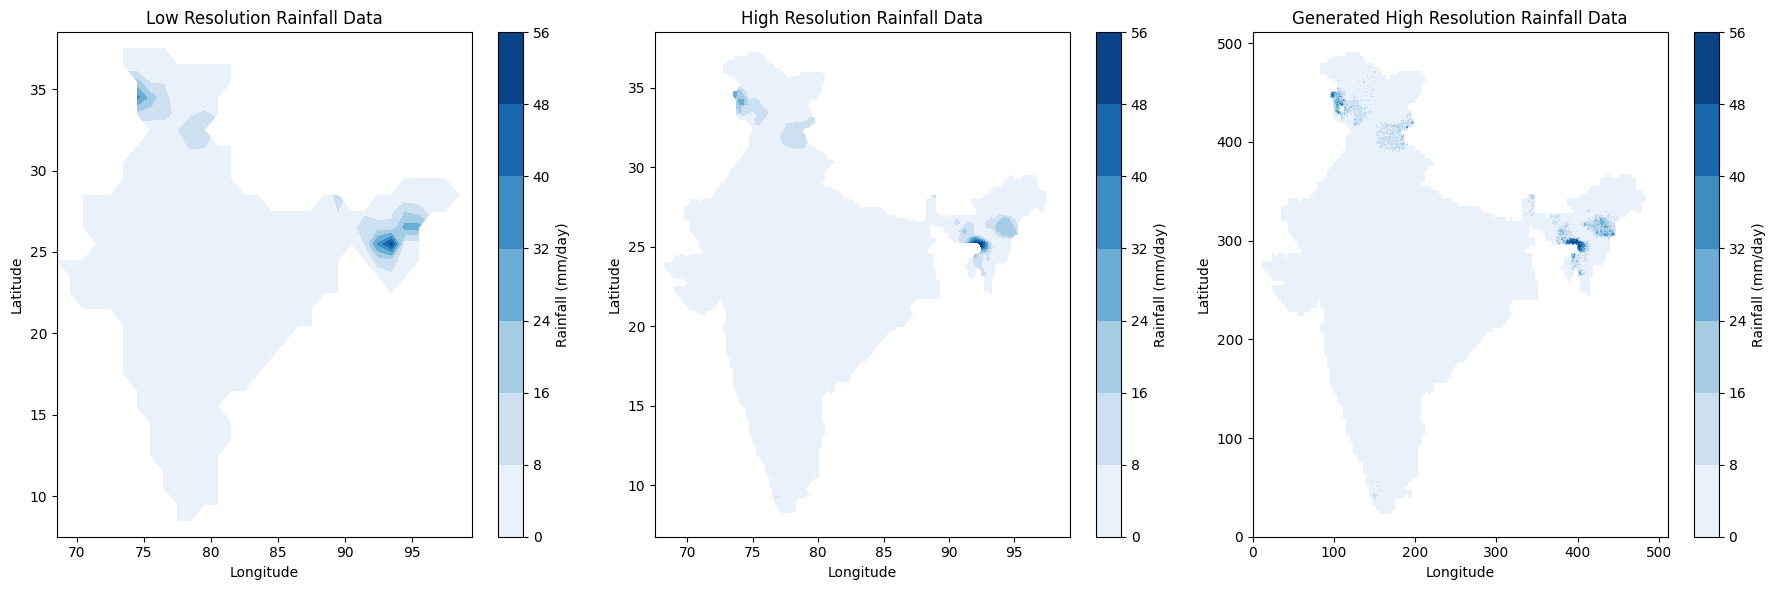

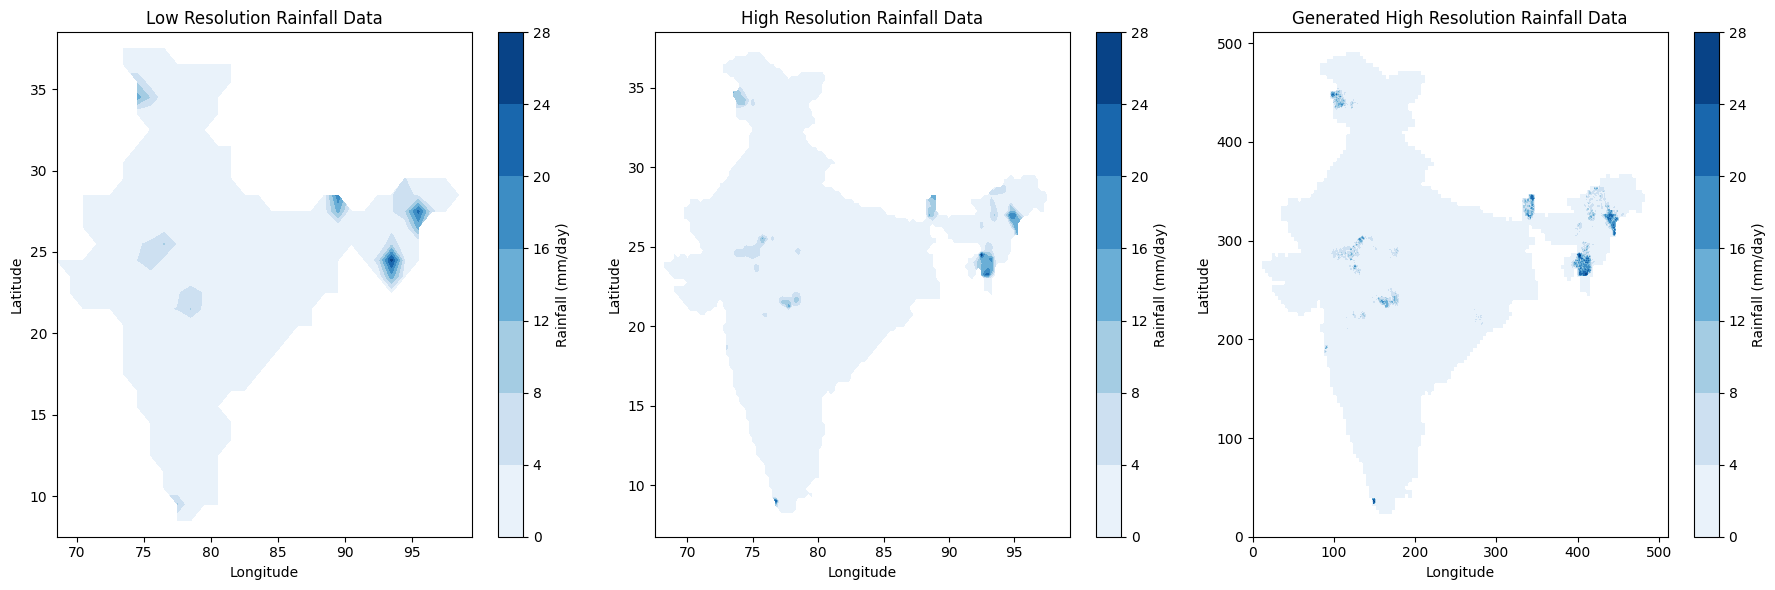

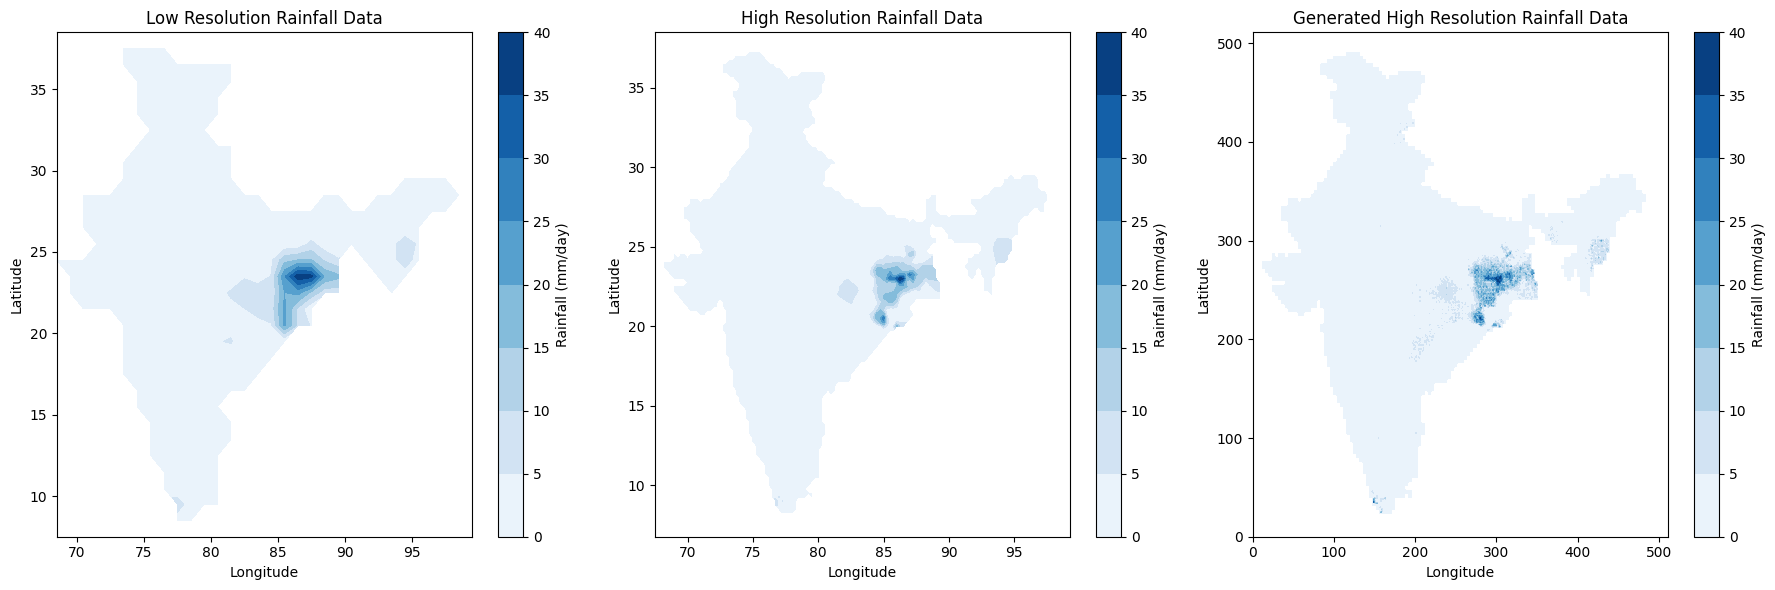

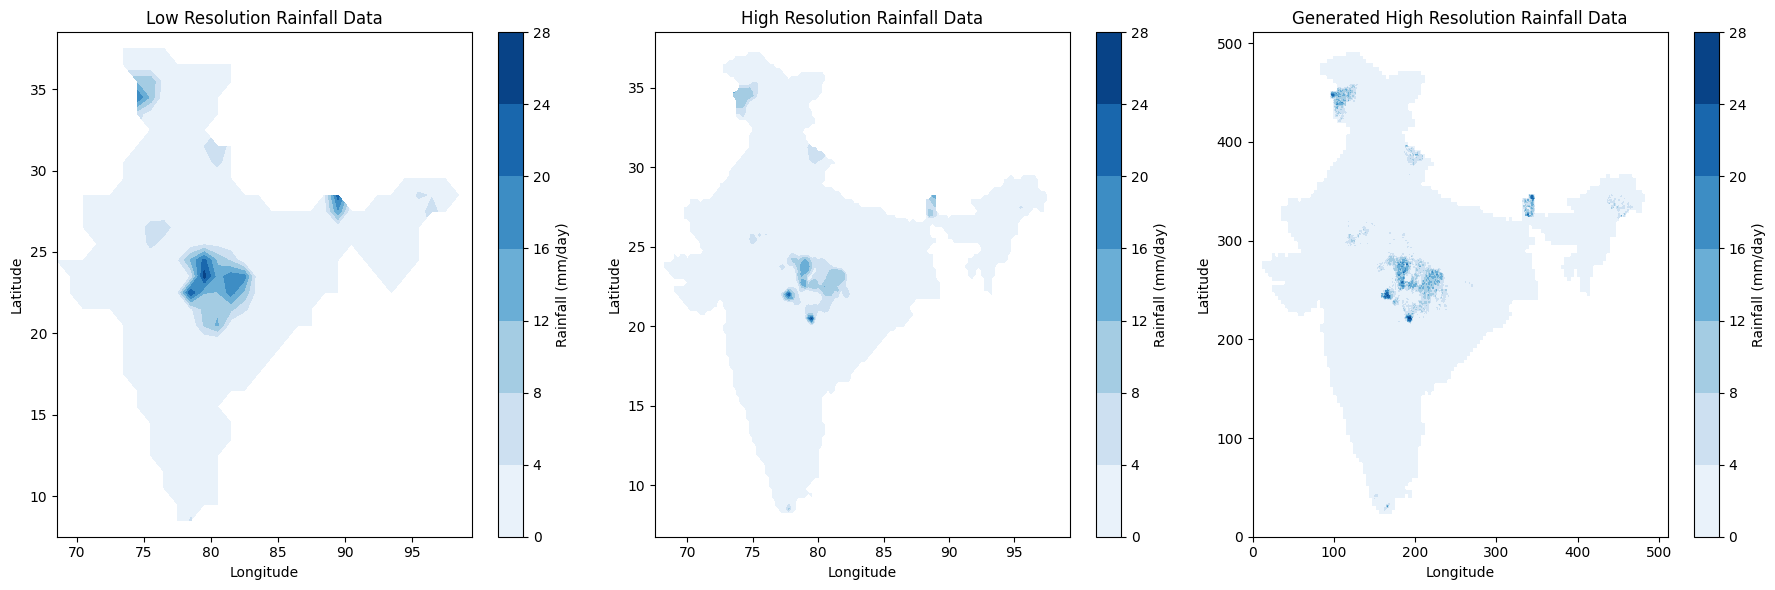

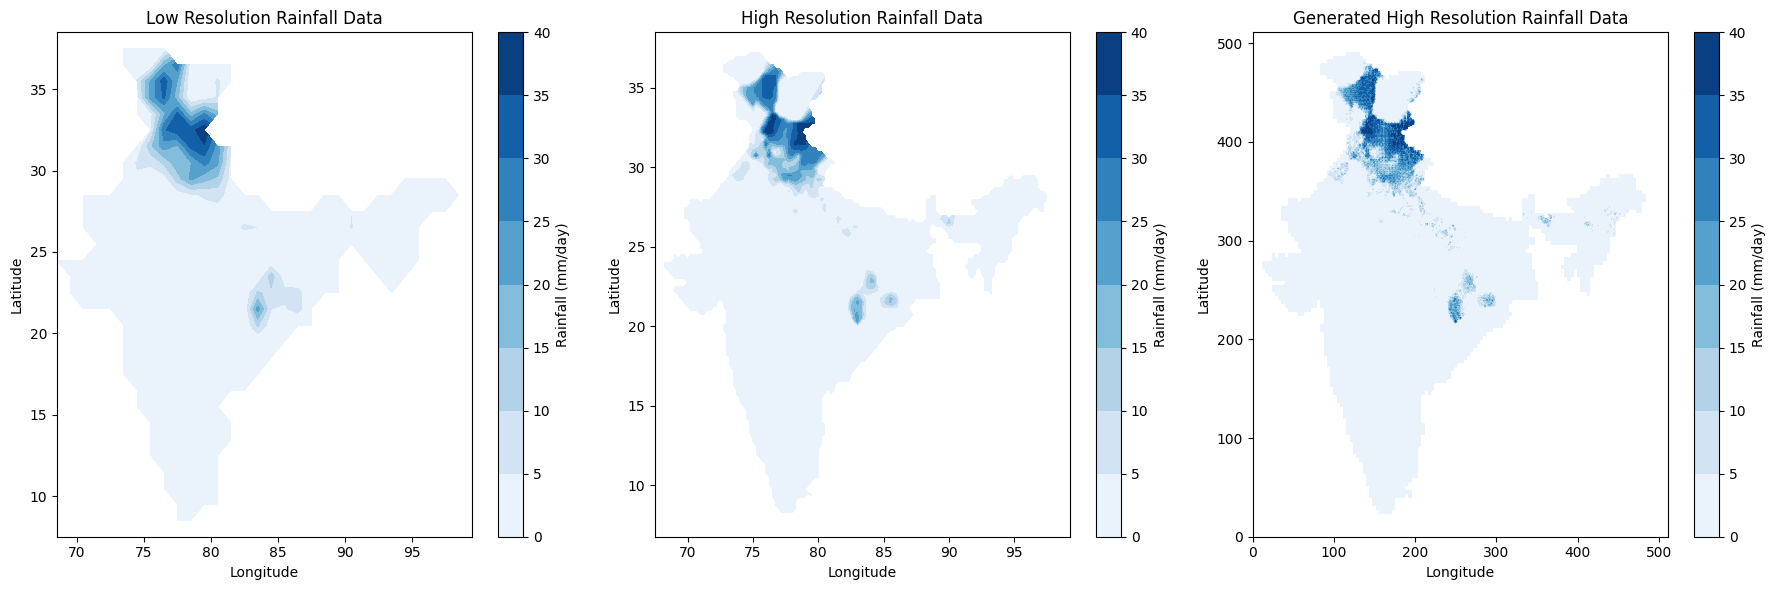

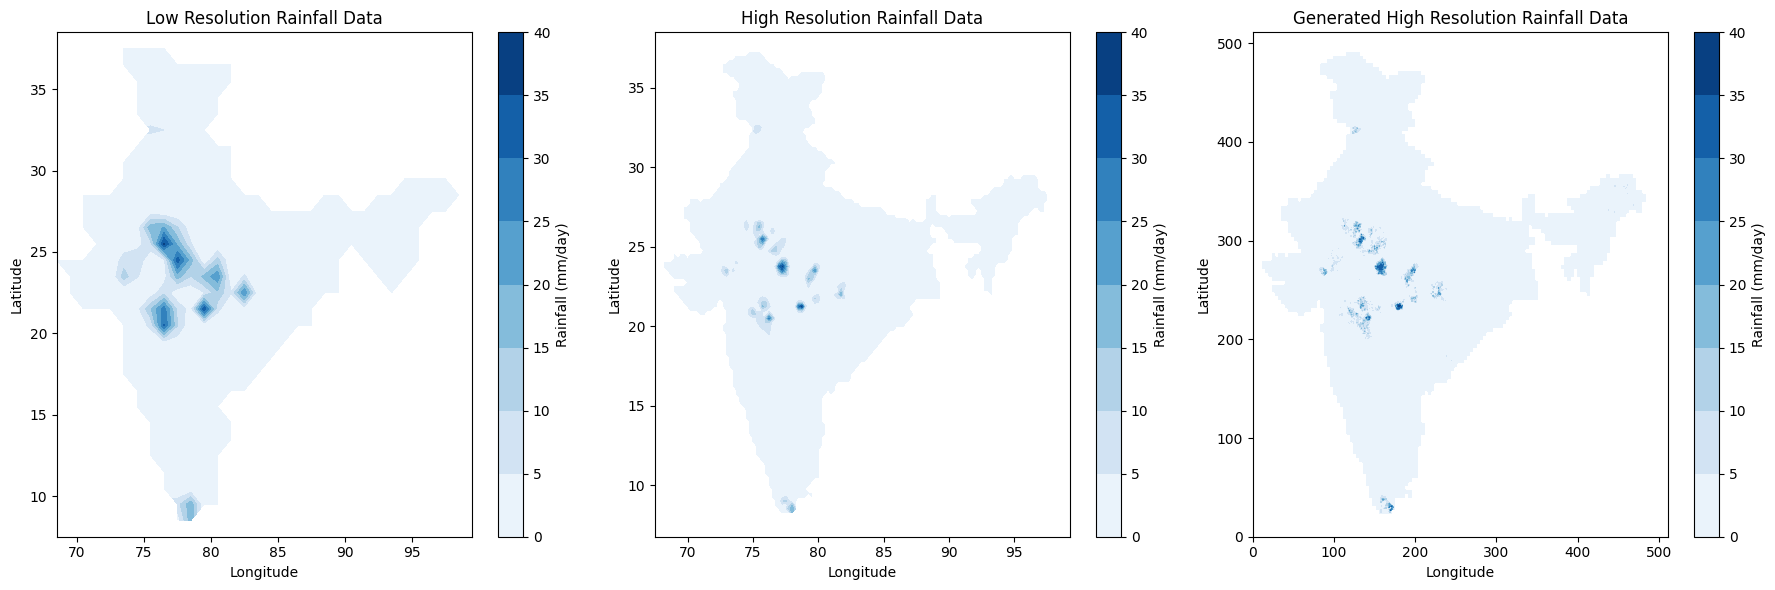

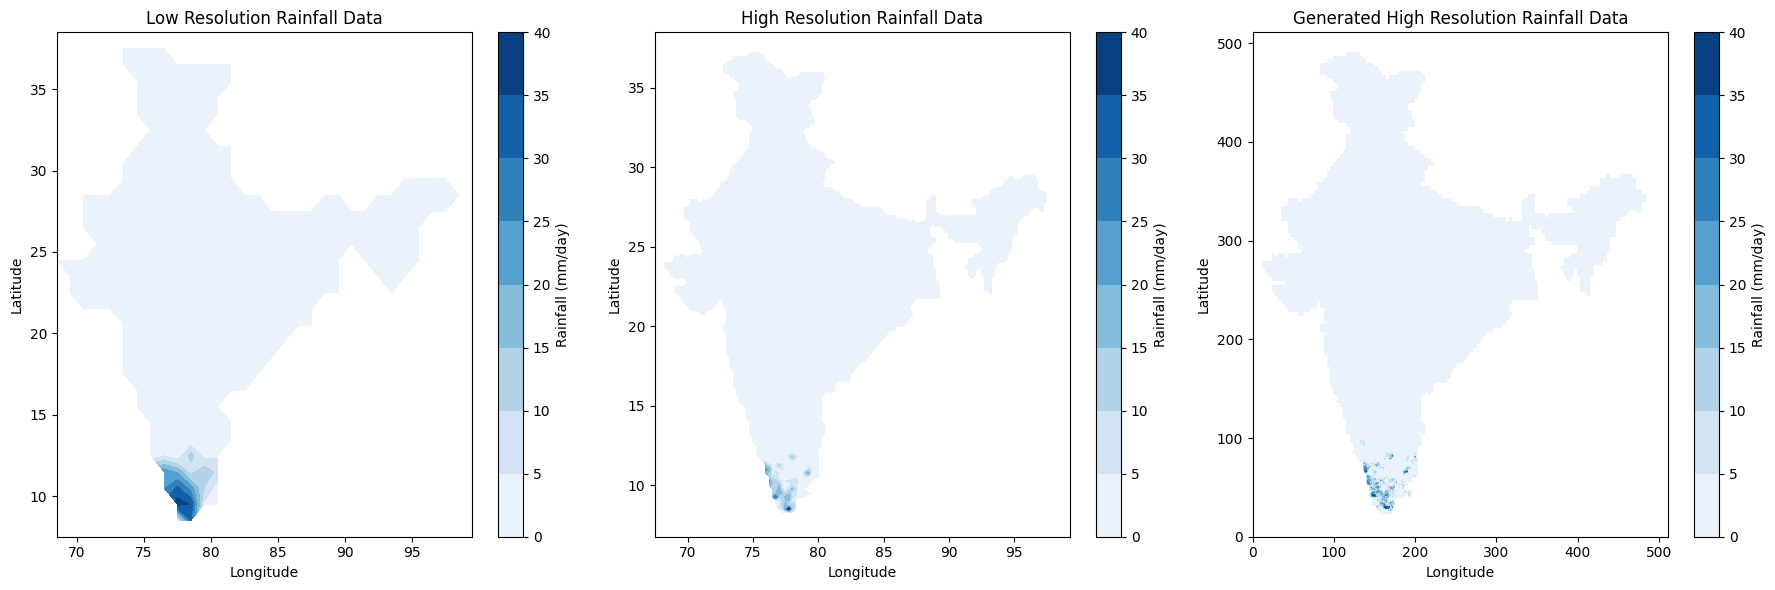

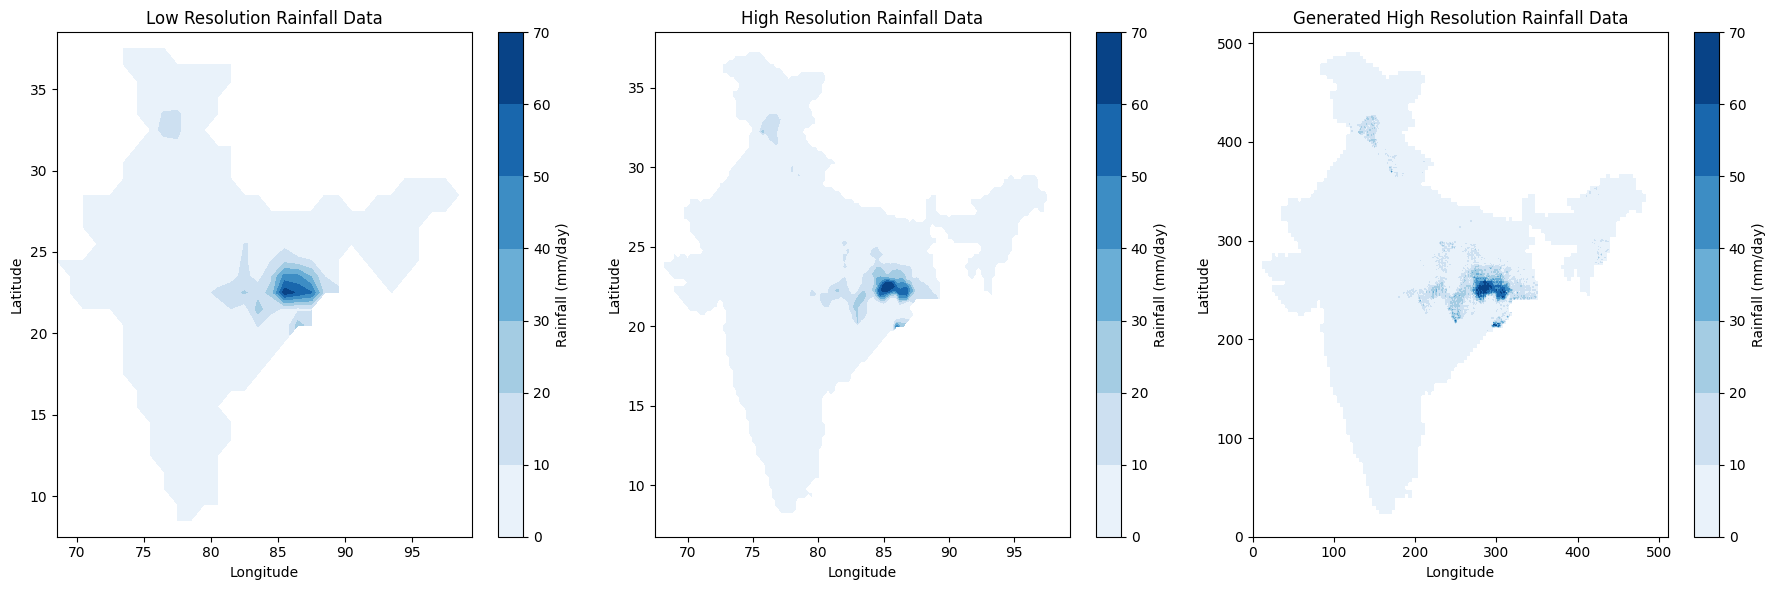

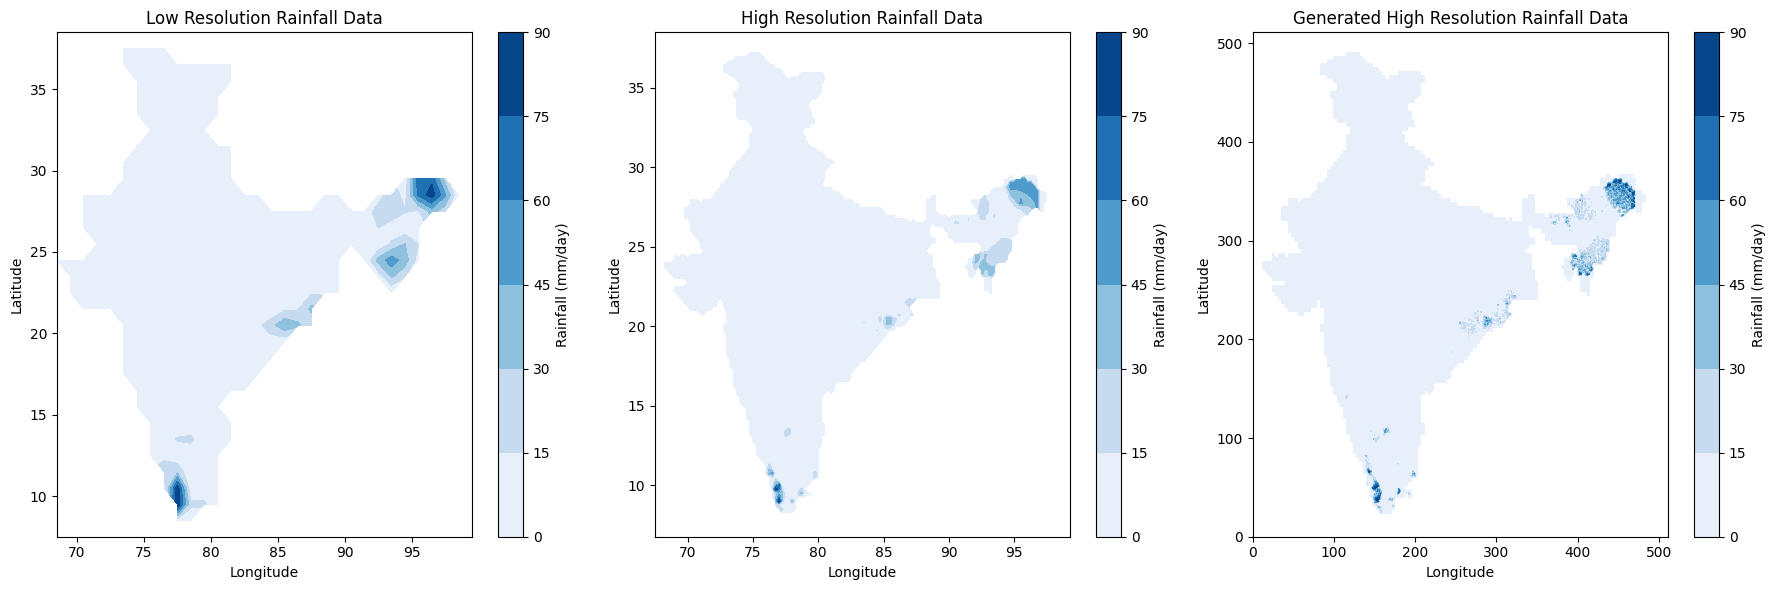

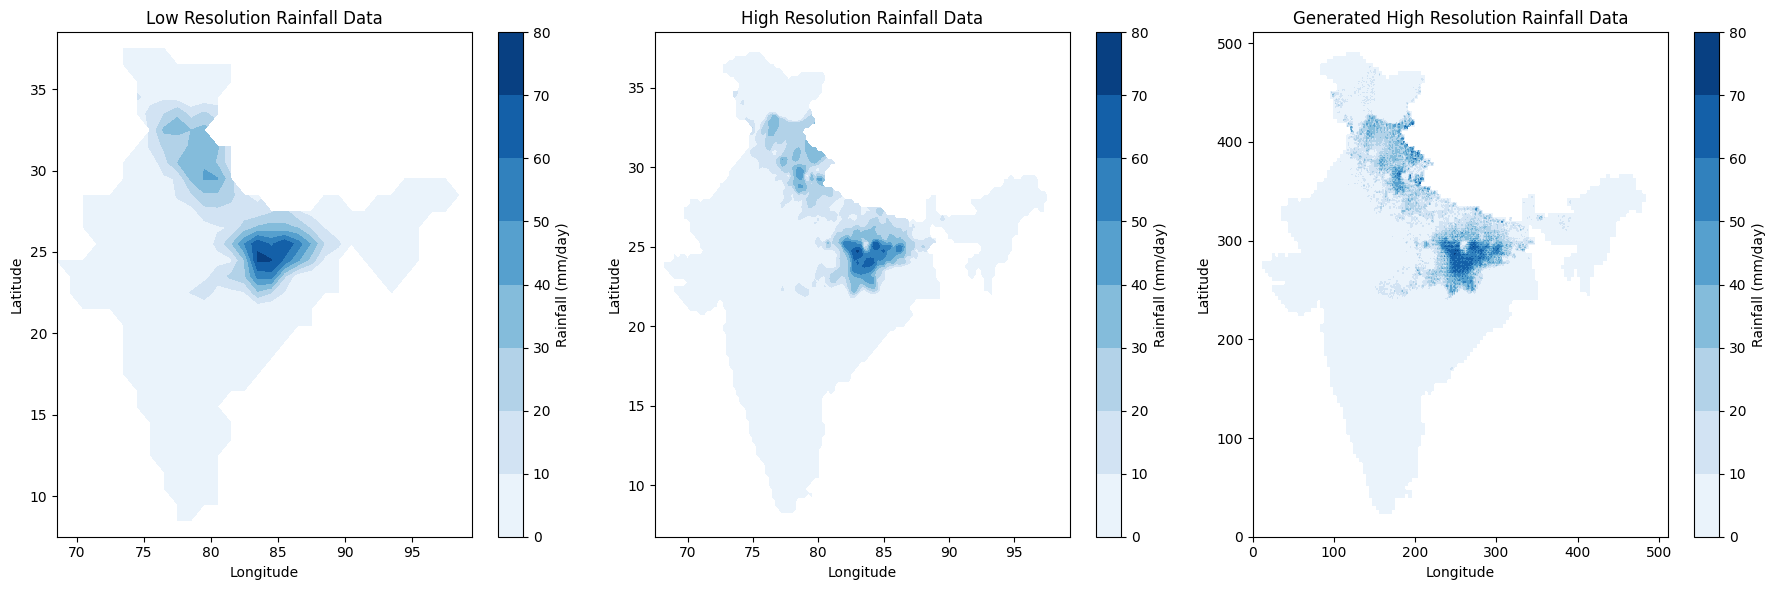

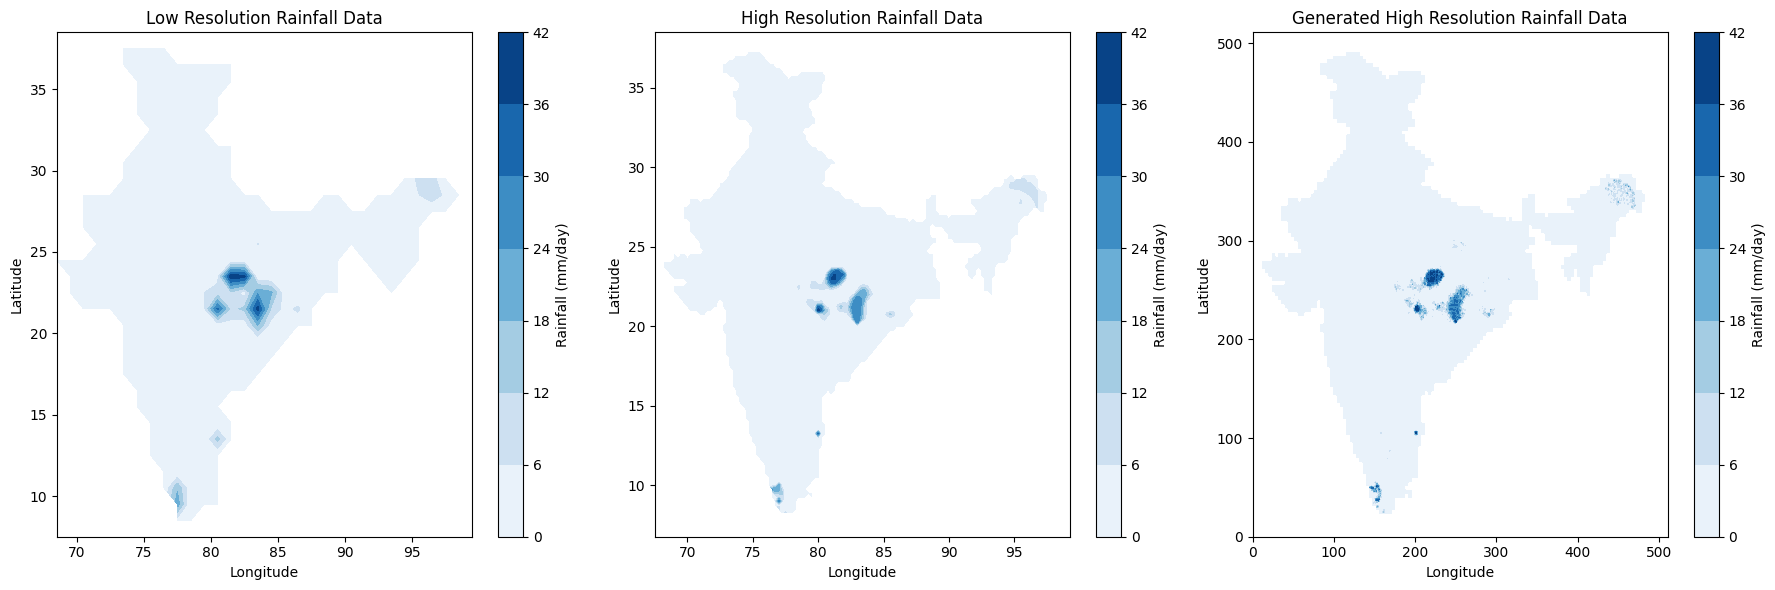

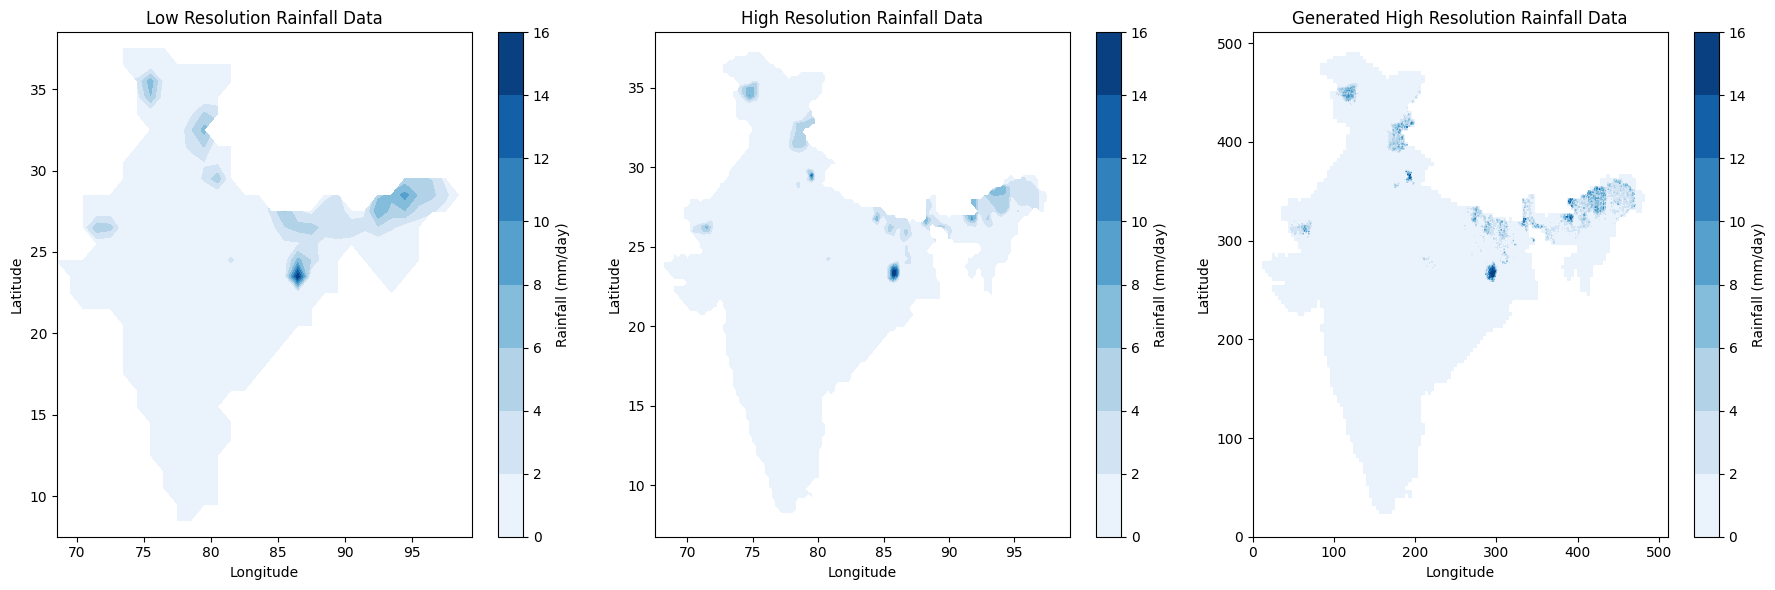

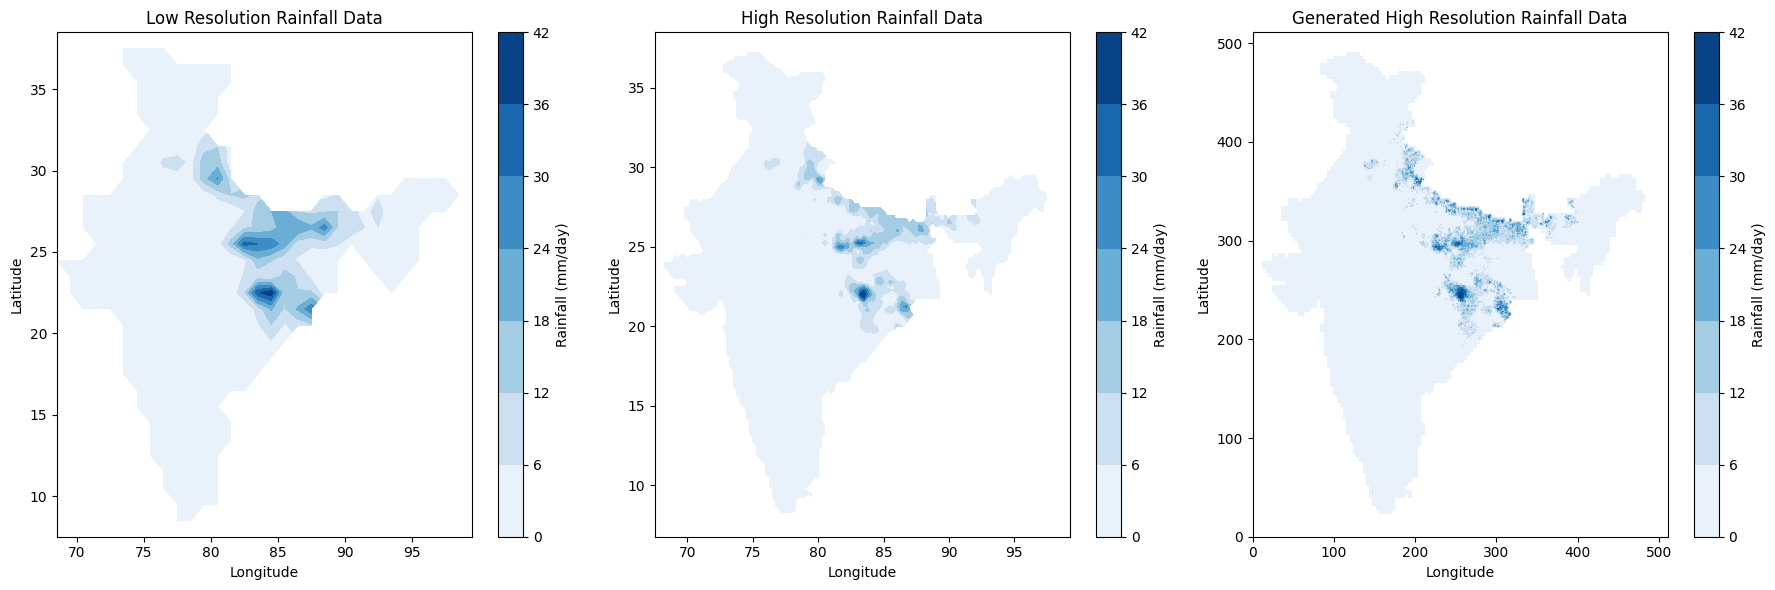

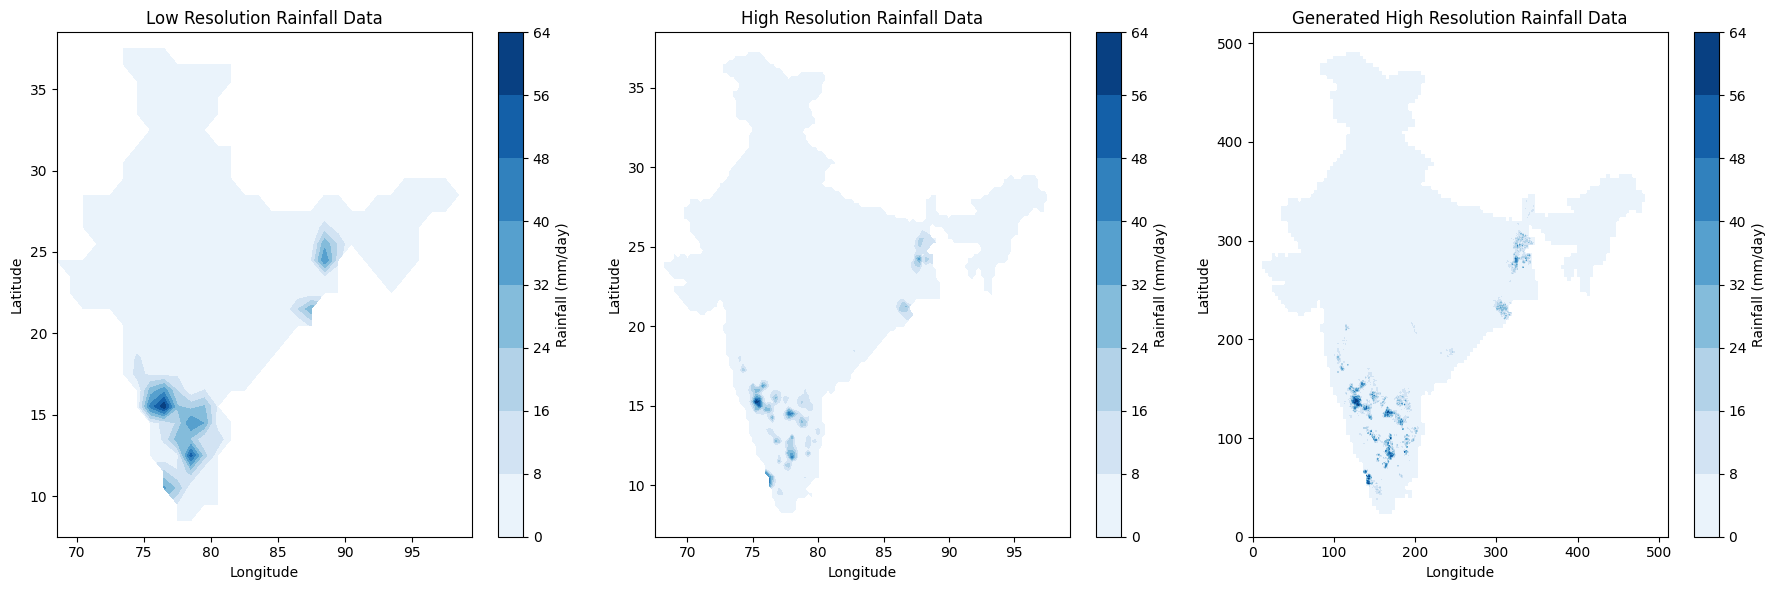

In [6]:
indices = np.random.choice(np.arange(0, len(SR_data) + 1), size=20, replace=False)
for i in indices:
    dp.visualize_master(SR_data_processed[i],LR_data_processed[i],SR_mask[0],LR_mask[0],HR_mask,Generator,daily_max[i])